In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Mengambil dataset wajah Olivetti dari scikit-learn
dataset = fetch_olivetti_faces()
faces = dataset.data
labels = dataset.target

# Membagi dataset menjadi subset pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(faces, labels, test_size=0.2, random_state=int(time.time()))

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(320, 4096)
(320,)
(80, 4096)
(80,)


In [4]:
df = pd.DataFrame(faces).astype(str)
df

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.30991736,0.3677686,0.41735536,0.44214877,0.5289256,0.607438,0.6570248,0.677686,0.69008267,0.6859504,...,0.6652893,0.6694215,0.6528926,0.661157,0.4752066,0.1322314,0.14876033,0.15289256,0.16115703,0.1570248
1,0.45454547,0.47107437,0.5123967,0.55785125,0.59504133,0.6404959,0.6818182,0.70247936,0.7107438,0.70247936,...,0.13636364,0.1570248,0.13636364,0.14876033,0.15289256,0.15289256,0.15289256,0.15289256,0.15289256,0.15289256
2,0.3181818,0.40082645,0.49173555,0.5289256,0.58677685,0.6570248,0.6818182,0.6859504,0.70247936,0.6983471,...,0.07438017,0.1322314,0.18181819,0.13636364,0.12809917,0.14876033,0.1446281,0.14049587,0.14876033,0.15289256
3,0.1983471,0.19421488,0.19421488,0.19421488,0.19008264,0.19008264,0.24380165,0.40495867,0.48347107,0.5165289,...,0.6528926,0.6363636,0.6570248,0.6859504,0.72727275,0.74380165,0.7644628,0.75206614,0.75206614,0.73966944
4,0.5,0.54545456,0.58264464,0.62396693,0.6487603,0.69008267,0.6942149,0.71487606,0.7231405,0.73140496,...,0.19008264,0.16115703,0.17768595,0.17355372,0.17768595,0.17768595,0.17768595,0.17768595,0.17355372,0.17355372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.40082645,0.49586776,0.57024795,0.6322314,0.6487603,0.6404959,0.661157,0.6363636,0.6652893,0.6983471,...,0.38842976,0.3966942,0.2644628,0.09917355,0.18181819,0.24380165,0.24793388,0.16115703,0.1570248,0.13636364
396,0.3677686,0.3677686,0.35123968,0.30165288,0.24793388,0.24793388,0.3677686,0.5123967,0.57438016,0.6280992,...,0.38016528,0.33471075,0.2892562,0.28512397,0.338843,0.40495867,0.45867768,0.4876033,0.5123967,0.5495868
397,0.5,0.53305787,0.607438,0.6280992,0.6570248,0.6322314,0.6570248,0.6694215,0.6735537,0.70247936,...,0.19421488,0.14876033,0.15289256,0.16115703,0.16115703,0.17355372,0.1570248,0.17768595,0.14876033,0.19008264
398,0.21487603,0.21900827,0.21900827,0.2231405,0.2107438,0.20247933,0.2768595,0.40082645,0.4876033,0.5495868,...,0.446281,0.39256197,0.3677686,0.4090909,0.47933885,0.5247934,0.54545456,0.57438016,0.59090906,0.60330576


In [5]:
df['Label'] = labels
df

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,Label
0,0.30991736,0.3677686,0.41735536,0.44214877,0.5289256,0.607438,0.6570248,0.677686,0.69008267,0.6859504,...,0.6694215,0.6528926,0.661157,0.4752066,0.1322314,0.14876033,0.15289256,0.16115703,0.1570248,0
1,0.45454547,0.47107437,0.5123967,0.55785125,0.59504133,0.6404959,0.6818182,0.70247936,0.7107438,0.70247936,...,0.1570248,0.13636364,0.14876033,0.15289256,0.15289256,0.15289256,0.15289256,0.15289256,0.15289256,0
2,0.3181818,0.40082645,0.49173555,0.5289256,0.58677685,0.6570248,0.6818182,0.6859504,0.70247936,0.6983471,...,0.1322314,0.18181819,0.13636364,0.12809917,0.14876033,0.1446281,0.14049587,0.14876033,0.15289256,0
3,0.1983471,0.19421488,0.19421488,0.19421488,0.19008264,0.19008264,0.24380165,0.40495867,0.48347107,0.5165289,...,0.6363636,0.6570248,0.6859504,0.72727275,0.74380165,0.7644628,0.75206614,0.75206614,0.73966944,0
4,0.5,0.54545456,0.58264464,0.62396693,0.6487603,0.69008267,0.6942149,0.71487606,0.7231405,0.73140496,...,0.16115703,0.17768595,0.17355372,0.17768595,0.17768595,0.17768595,0.17768595,0.17355372,0.17355372,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.40082645,0.49586776,0.57024795,0.6322314,0.6487603,0.6404959,0.661157,0.6363636,0.6652893,0.6983471,...,0.3966942,0.2644628,0.09917355,0.18181819,0.24380165,0.24793388,0.16115703,0.1570248,0.13636364,39
396,0.3677686,0.3677686,0.35123968,0.30165288,0.24793388,0.24793388,0.3677686,0.5123967,0.57438016,0.6280992,...,0.33471075,0.2892562,0.28512397,0.338843,0.40495867,0.45867768,0.4876033,0.5123967,0.5495868,39
397,0.5,0.53305787,0.607438,0.6280992,0.6570248,0.6322314,0.6570248,0.6694215,0.6735537,0.70247936,...,0.14876033,0.15289256,0.16115703,0.16115703,0.17355372,0.1570248,0.17768595,0.14876033,0.19008264,39
398,0.21487603,0.21900827,0.21900827,0.2231405,0.2107438,0.20247933,0.2768595,0.40082645,0.4876033,0.5495868,...,0.39256197,0.3677686,0.4090909,0.47933885,0.5247934,0.54545456,0.57438016,0.59090906,0.60330576,39


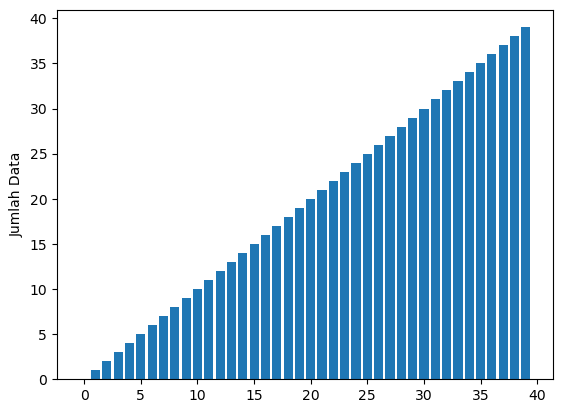

In [6]:
# Menghitung jumlah data untuk setiap nilai target
jumlah_data_target = df['Label'].value_counts()

# Membuat plot bar chart
plt.bar(jumlah_data_target.index, jumlah_data_target.index)

# Memberi label pada sumbu x dan y
plt.xlabel('')
plt.ylabel('Jumlah Data')

# Menampilkan plot
plt.show()

In [7]:
# Menggunakan PCA untuk reduksi dimensi
n_components = 5  # Jumlah komponen yang diinginkan
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

# Cetak hasil PCA
print(X_train_pca)
print('')

print(X_test_pca)

[[ 1.0444103  -1.5032742  -4.0182123   0.40061557 -1.2821221 ]
 [ 4.049617    1.4611847   4.409284    0.03838139  1.4351729 ]
 [ 0.3942849  -0.09997828  2.0650015  -2.4538136   1.5391401 ]
 ...
 [ 4.228569    2.0373755  -0.05797229  1.6809498   0.5126048 ]
 [-0.9662515  -3.9503365   2.615944   -0.84343994  1.2871155 ]
 [-1.0680547  -3.096355    1.0600741  -0.00948895 -1.2982244 ]]

[[-3.7469163  -2.1321673   2.073909   -0.61805654 -0.26782   ]
 [-5.676271    1.0228056  -3.091958    2.9015932   0.82728356]
 [ 4.598499    0.03149885 -1.3722337  -2.1171734   1.2216058 ]
 [-2.1268966   3.3699303  -1.6203488   4.5151453  -0.90266633]
 [ 5.5558667  -2.265035   -0.4651156   0.13610303  1.3847027 ]
 [ 5.0558496  -1.5781304  -0.6304148  -0.2833089   1.1261737 ]
 [ 8.909162   -1.0923748  -0.85484946 -0.58080494 -0.979318  ]
 [-0.3252433  -2.6401277   2.046829   -0.8212099   2.8846753 ]
 [ 0.07925879  2.9126415  -2.2611003   1.0493286  -3.0064087 ]
 [ 9.496439    1.0666808  -0.65816814  0.3491131

In [8]:
# Melatih model klasifikasi dengan SVM
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)

# Memprediksi label kelas untuk subset pengujian
y_pred = svm.predict(X_train_pca)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_train, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 90.94%


In [9]:
svm.fit(X_test_pca, y_test)

# Memprediksi label kelas untuk subset pengujian
y_pred2 = svm.predict(X_test_pca)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred2)
print("Akurasi: {:.2f}%".format(accuracy * 100))

Akurasi: 100.00%
